<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cluster Analysis in Python

In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python.

This course covers pre-processing of data and application of hierarchical and k-means clustering.  After completing the course, you will be able to
* quickly apply various clustering algorithms on data,
* visualize the clusters formed 
* and analyze results.

##Introduction to Clustering

###Unsupervised learning: basics

 *How does the algorithm decide which articles are similar?*

 It is the result of an **unsupervised learning algorithm**.  It scans through the text of each article and based on frequently occurring terms, groups articles together. 

 *Labeled and unlabeled data*

Imagine you have a list of points with X and Y coordinates.

* If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called **unlabeled data**.

* At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it **labeled data**.

*What is unsupervised learning?*

It is an umbrella **term for a group of machine learning algorithms that are used to find patterns**.

 The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm.

  The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are:
  * clustering,
  * anomaly detections,
  * and neural networks. 
  
>  Clustering is used to group similar data points together.

*What is clustering?*

Clustering is the process of **grouping items with similar characteristics**. 

> The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters.

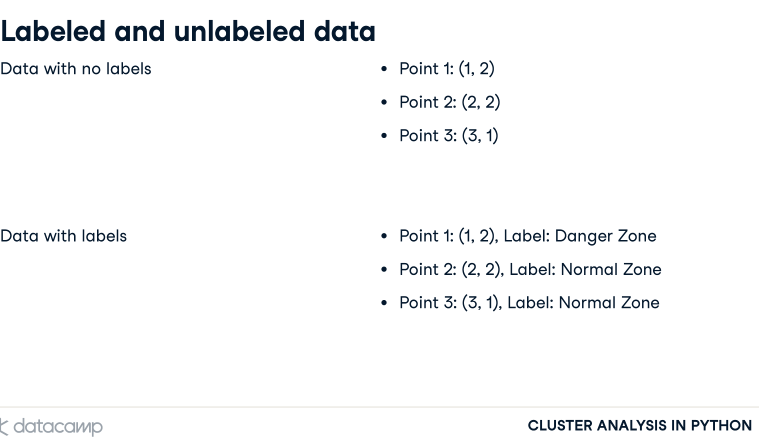


**Plotting data for clustering - Pokemon sightings**

We will plot the sightings of Pokemon in a park in the form of coordinates. 

* import the required class as plt
```
from matplotlib import pyplot as plt
```

* define the coordinates of points to be plotted in two lists - one each for x and y coordinates
```
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]
```

> In this case, we have fifteen sightings that we would like to plot

* use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot.

```
plt.scatter(x_coordinates, y_coordinates)
plt.show()
```
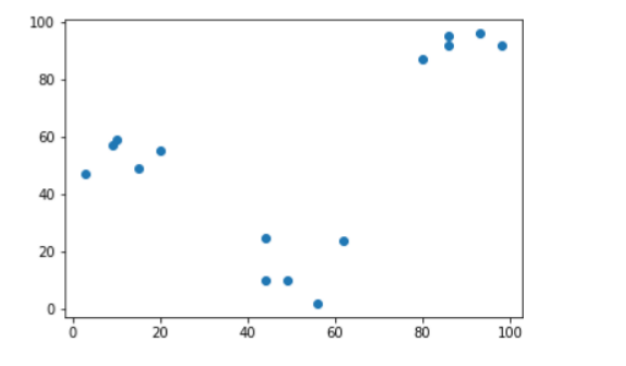

As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data. 

There are three clusters in the data, which are highlighted in the plot. By visualizing this data, you can infer with some confidence where the Pokemon actually are!

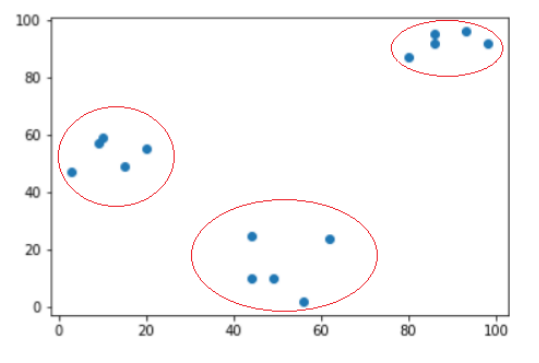

###Basics of cluster analysis

*What is a cluster?*

*  a cluster of news articles has similar words and word associations appearing in them.
* is segmentation of customers based on their spending habits - cluster of customers would exhibit similar spending habits.

*Clustering algorithms*:
* density based DBSCAN 
* Gaussian models
* hierarchical
* k-means clustering
* etc...

**Hierarchical clustering algorithm**

1. For demonstration purposes, let us consider 13 points on a 2D plane.

2. In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

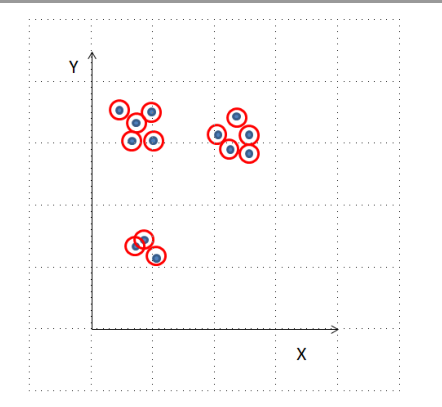

3. Next, the distances between all pairs of cluster centers are computed and **the two closest clusters are merged**. The cluster center of the merged cluster is then recomputed. In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

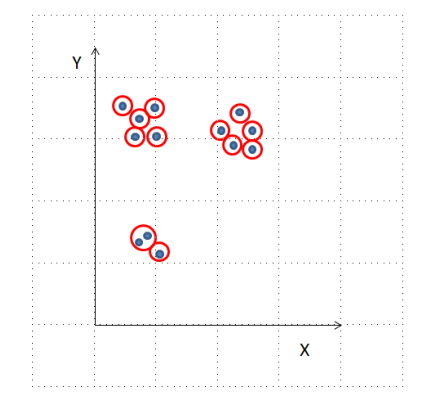

4. In the second step, **the clusters with the closest cluster centers are merged on the top left**. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

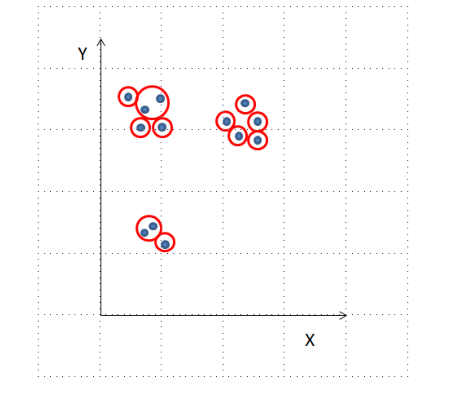

5. Finally, these are three clusters that you arrive at after the algorithm has run. 

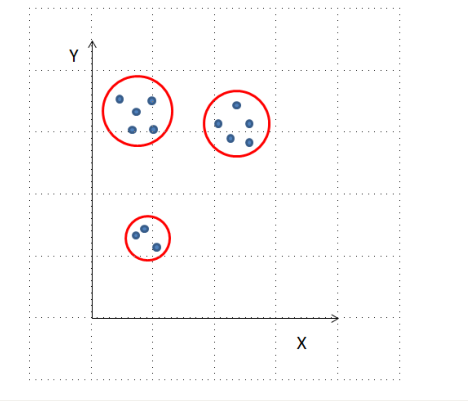

**Hierarchical clustering in SciPy**

The required methods for hierarchical clustering, linkage and fcluster, are stored in ```scipy.cluster.hierarchy```.

*  import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a dataframe. 

```
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
'y_coordinate': y_coordinates})
```

* the linkage method computes distances between intermediate clusters

```
Z = linkage(df, 'ward')

```

* the fcluster method generates clusters and assigns associated cluster labels to a new column in the dataframe

```
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')
```

* plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)
plt.show()
```

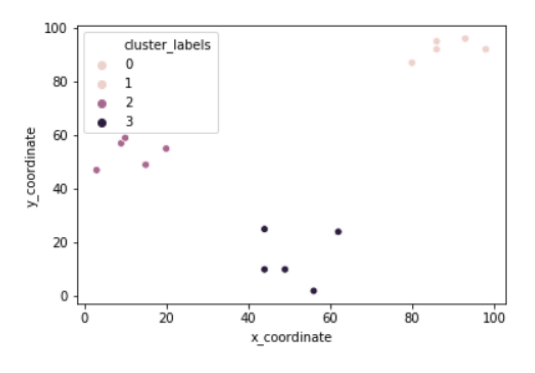

> the result of the seaborn scatterplot, shows the three clusters.

**K-means clustering algorithm**

1. First, a random cluster center is generated for each of the three clusters.

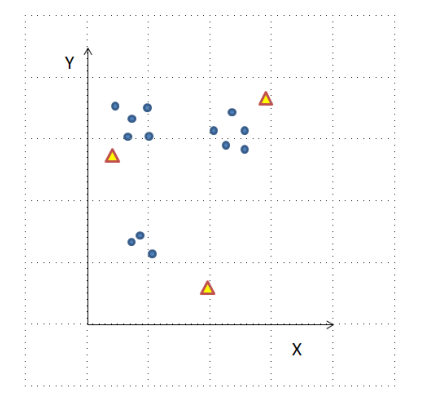

2. Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

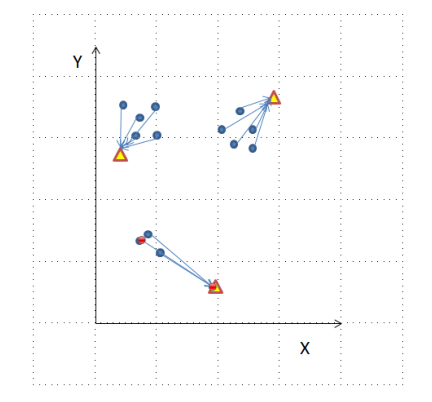

3. The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

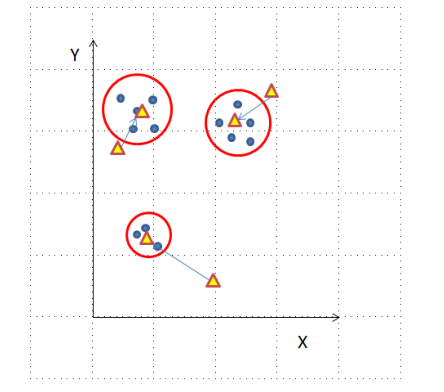

**K-means clustering in SciPy**

K-means clustering is implemented using methods kmeans and vq of ```scipy.cluster.vq```.

* The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq

```
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random

random.seed((1000,2000))

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)
```
> the second argument in both methods is distortion, which we capture in a dummy variable

* plot the clusters using seaborn

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)

plt.show()
```

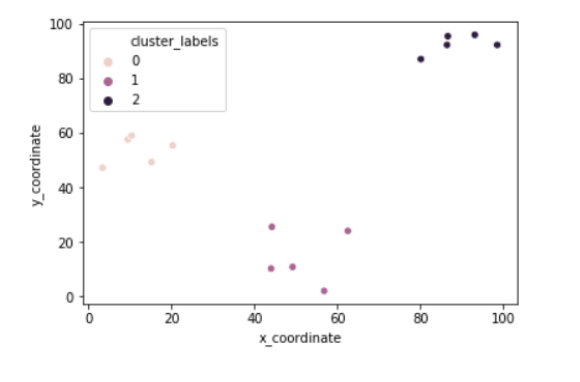

**hierarchical clustering**

form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd

* Import the linkage and fcluster libraries.
* Use the linkage() function to compute distances using the ward method.
* Generate cluster labels for each data point with two clusters using the fcluster() function.
* Plot the points with seaborn and assign a different color to each cluster.

```
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

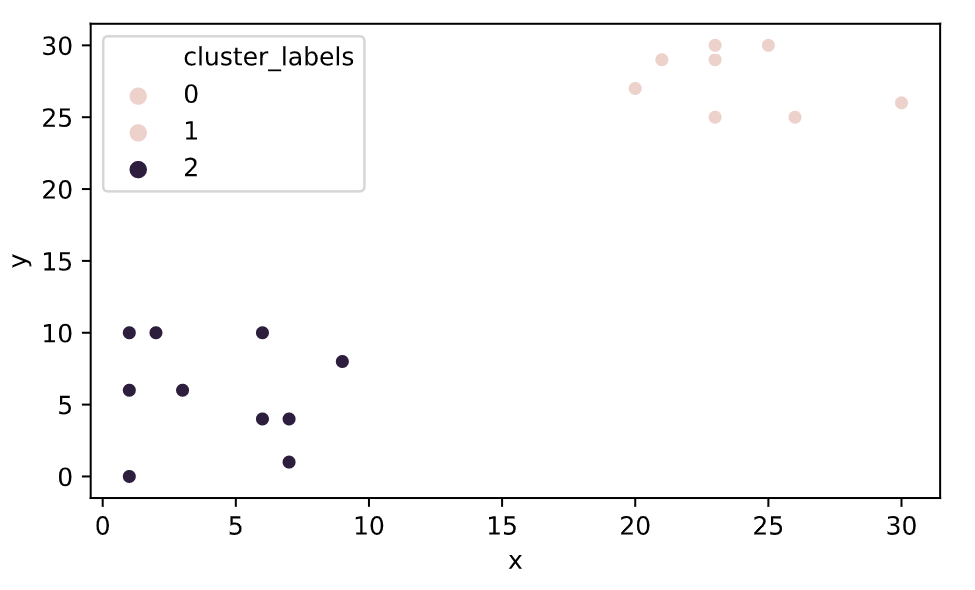

**k-means clustering**

orm clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

* Import the kmeans and vq functions.
* Use the kmeans() function to compute cluster centers by defining two clusters.
* Assign cluster labels to each data point using vq() function.
* Plot the points with seaborn and assign a different color to each cluster

```
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

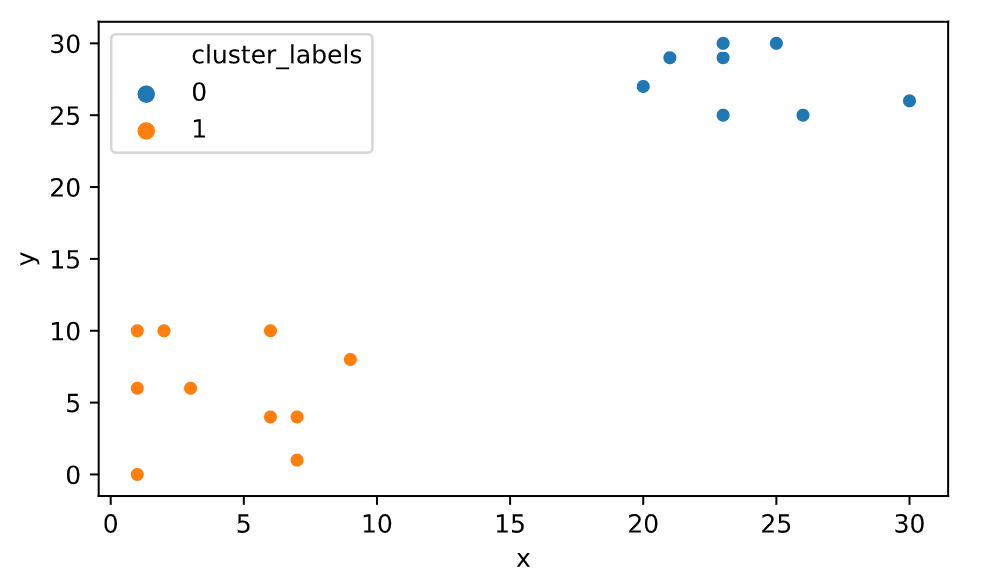

###Data preparation for cluster analysis

Now that you are familiar with the two basic clustering techniques, let us discuss an important step in processing data that we should apply before performing clustering.

*Why do we need to prepare data for clustering?*

 Imagine a situation where you have a set of variables with incomparable units  
 > such as the dimensions of a product and its price. 

 Even if variables have the same unit, they may be significantly different in terms of their scales and variances.

 For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? We use a process called **normalization**.

*Normalization of data*

 It is a process by which we rescale the values of a variable with respect to standard deviation of the data.

 The resultant standard deviation post normalization is 1. The process of normalization is simple and achieved through **dividing a value by its standard deviation**. 

 A normalization library is available on the SciPy package, using the whiten method of the vq class. 

*  initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. 

> Note that, in the example, we use a one dimensional list. In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

```
from scipy.cluster.vq import whiten

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)

print(scaled_data)

[2.73, 0.55, 1.64, 1.64, 1.09, 1.64, 1.64, 4.36, 0.55, 1.09, 1.09, 1.64, 2.73]
```

**Illustration: normalization of data**

Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. 

* import the pyplot class of the matplotlib library in Python

```
# Import plotting library
from matplotlib import pyplot as plt
```

* initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs.

```
# Initialize original, scaled data
plt.plot(data,
label="original")
plt.plot(scaled_data,
label="scaled")
```

* enable the legend in the graph and then display the plot. 

> Let us see how the plot looks like.

```
# Show legend and display plot
plt.legend()
plt.show()
```
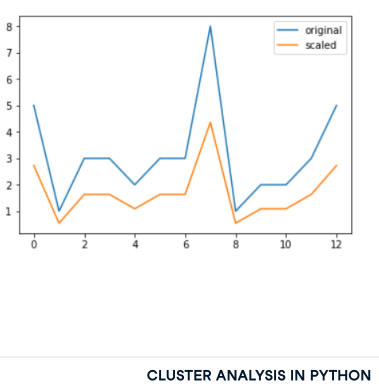




> The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis. As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

**Normalize basic list data**

try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

* Import the whiten function.
* Use the whiten() function to standardize the data.

```
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
```

```
[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077 1.53846154 0. 0.76923077 3.07692308]
```

**Visualize normalized data**

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

* Use the matplotlib library to plot the original and scaled data.
* Show the legend in the plot.
* Display the plot.

```
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()
```

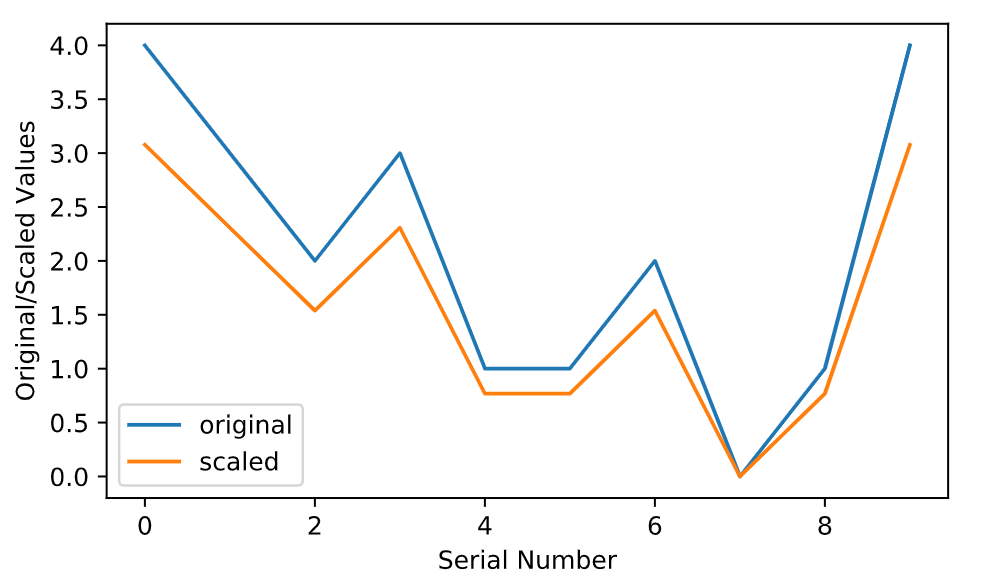

**Normalization of small numbers**

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

* Scale the list rate_cuts, which contains the changes in interest rates.
* Plot the original data against the scaled data.

```
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()'
```

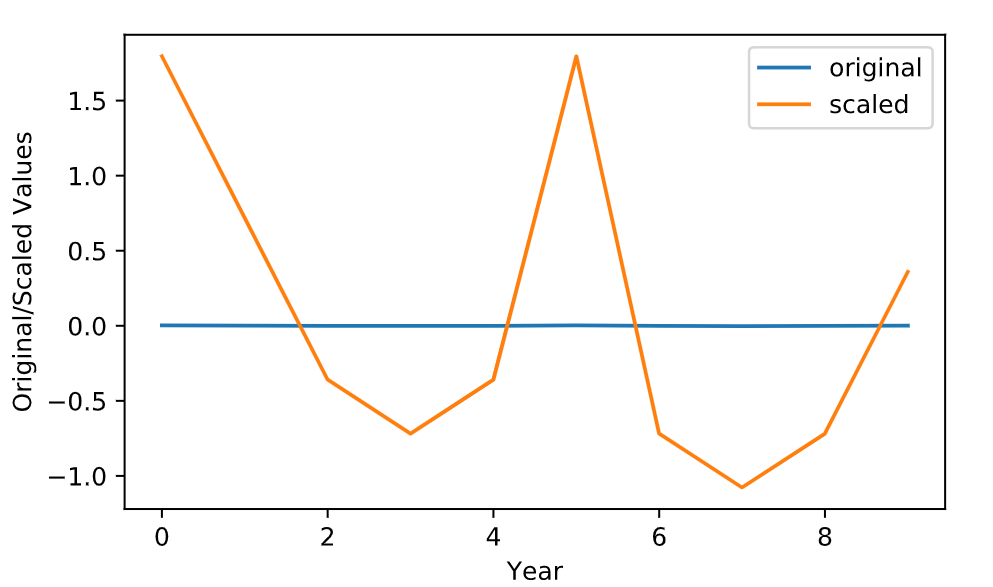

> Notice how the changes in the original data are negligible as compared to the scaled data

**FIFA 18: Normalize data**

The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

* Scale the values of eur_wage and eur_value using the whiten() function.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])
```

* Plot the scaled wages and transfer values of players using the .plot() method of Pandas.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()
```
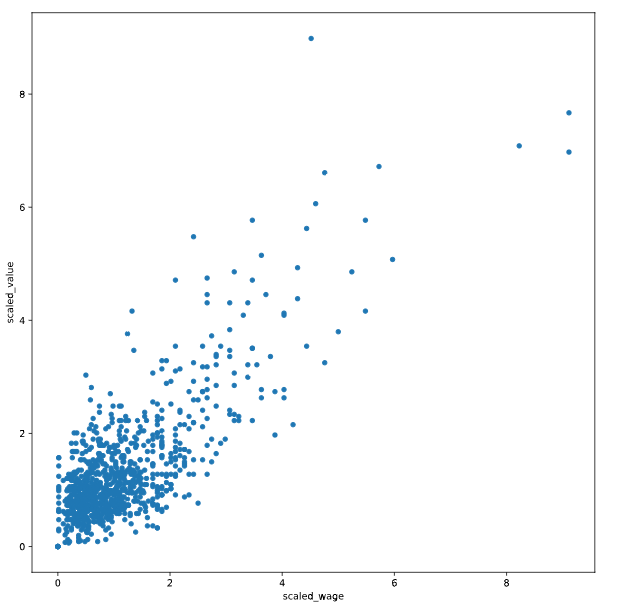
* Check the mean and standard deviation of the scaled data using the .describe() method of Pandas.

```
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())
```

```
<script.py> output:
           scaled_wage  scaled_value
    count      1000.00       1000.00
    mean          1.12          1.31
    std           1.00          1.00
    min           0.00          0.00
    25%           0.47          0.73
    50%           0.85          1.02
    75%           1.41          1.54
    max           9.11          8.98
```

> As you can see the scaled values have a standard deviation of 1.

##Hierarchical Clustering

###Basics of hierarchical clustering

This chapter focuses on performing hierarchical clustering with SciPy.

*Creating a distance matrix using linkage*

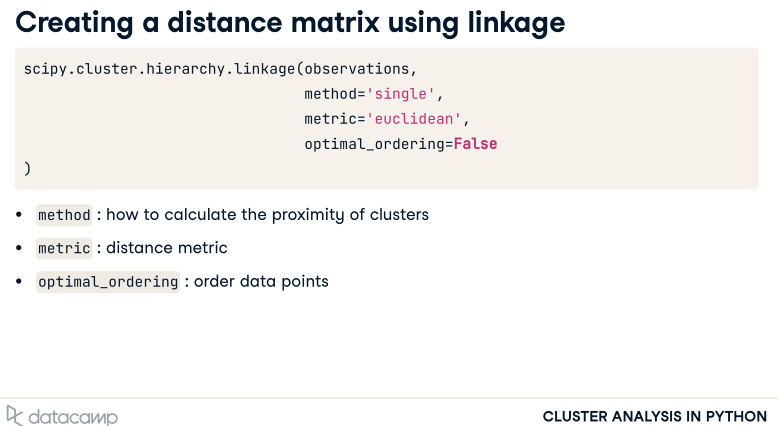

A critical step is to compute the distance matrix at each stage. This is achieved through the linkage method available in ```scipy.cluster.hierarchy```.

his process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points. 
There are four parameters for this method. 
* The first parameter is the **observations**. 
* The second parameter, **method**, tells the algorithm how to calculate proximity between two clusters. 
* The **metric** is the function that decides the distance between two objects. 
 **Euclidean distance** is a straight line distance between two points on a 2D plane. 

> **The optimal_ordering** is an optional argument that changes the order of linkage matrix. 

*Which method should use?*

The second parameter, method, decides how clusters are separated at each step. 

* **The single method** decides the proximity of clusters based on their two closest objects. 
* **The complete method** decides the proximity of cluster centers based on their two farthest objects. 
* **The average and centroid methods** decide cluster proximities based on arithmetic and geometric means, respectively. 
* **The median method** uses the median of cluster objects. 
* **The ward method** that we used earlier computes cluster proximity using the difference between summed squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center.
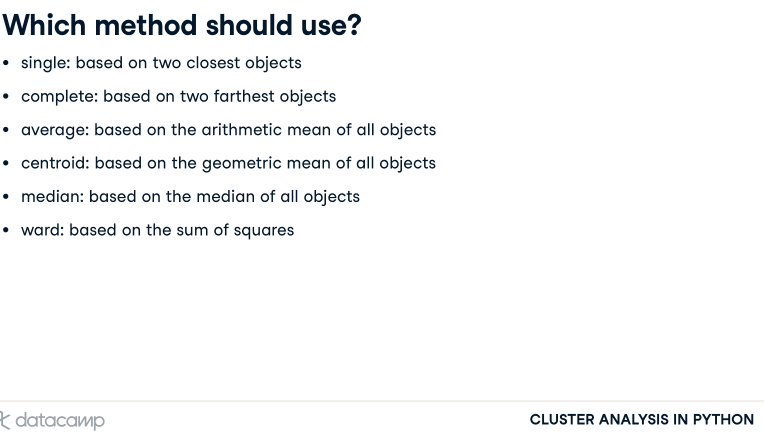
**Create cluster labels with fcluster**



Once you have created the distance matrix, you can create the cluster labels through the fcluster method, which takes three arguments 
* the distance matrix, 
* the number of clusters 
* and the criteria to form the clusters based on certain thresholds.

**Hierarchical clustering with ward method**

Notice that clusters are generally dense towards the centers.
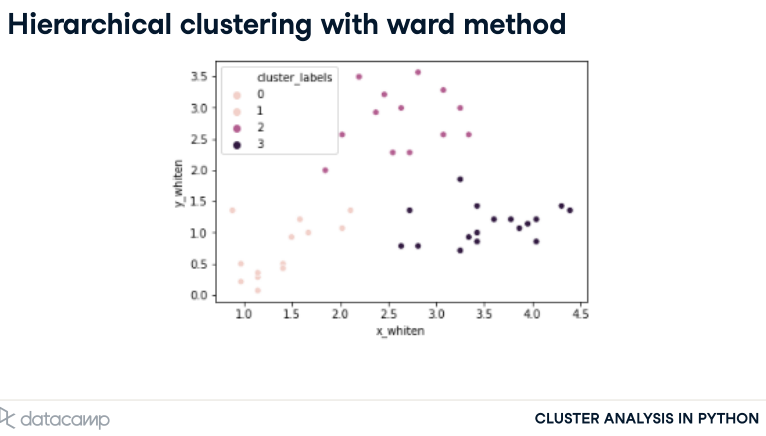


**Hierarchical clustering with single method**

Recall the single method used the two closest objects between clusters to determine the inter-cluster proximity. 

> Naturally, the clusters formed when performing clustering through this method are more dispersed. Although the top cluster, labelled 1, is roughly the same, most objects from cluster 3 have shifted to cluster 2.

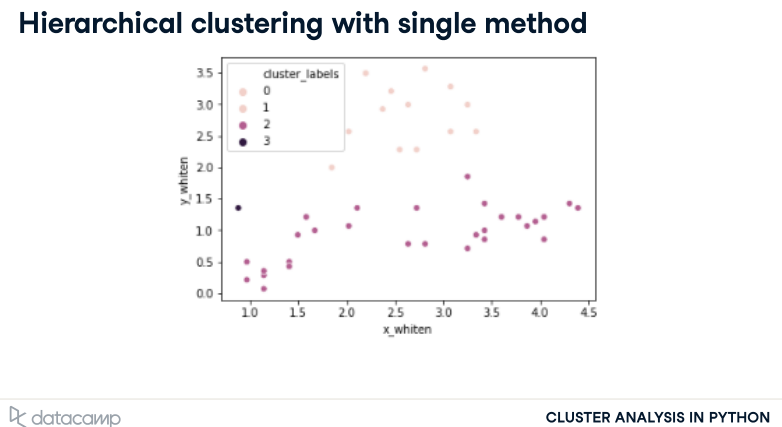

**Hierarchical clustering with complete method**

This method uses the two farthest objects among clusters to determine inter-cluster proximity. Coincidentally, though, the results of the complete method on the same data points that we used is similar to that of the ward method.

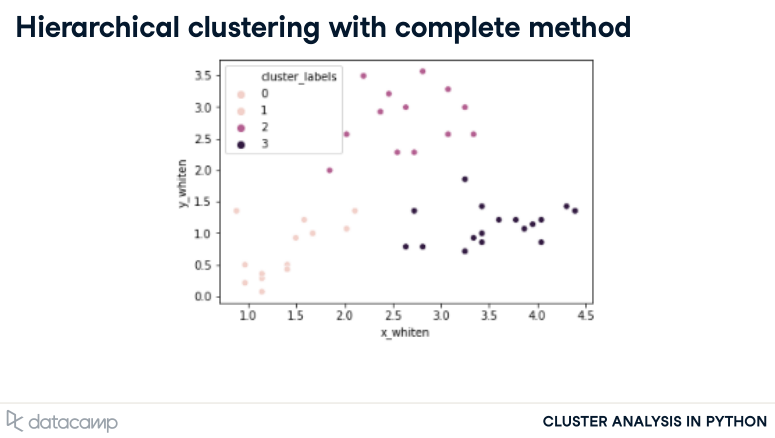

**Hierarchical clustering: ward method**

omic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* import fcluster and linkage from scipy.cluster.hierarchy.
* Use the ward method in the linkage() function.
* Assign cluster labels by forming 2 flat clusters from distance_matrix.
* Run the plotting code to see the results.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

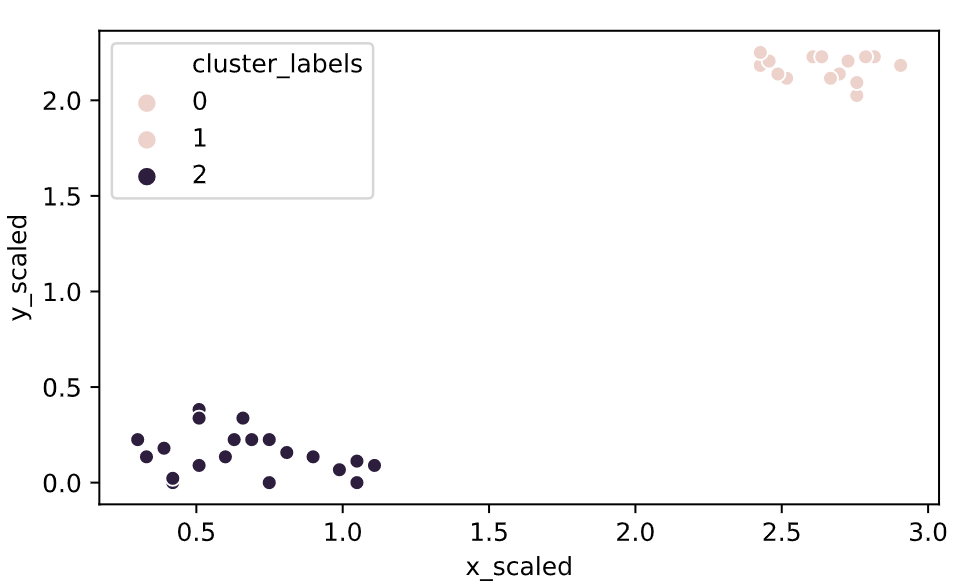

**Hierarchical clustering: single method**

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.


* Import fcluster and linkage from scipy.cluster.hierarchy.
* Use the single method in the linkage() function.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

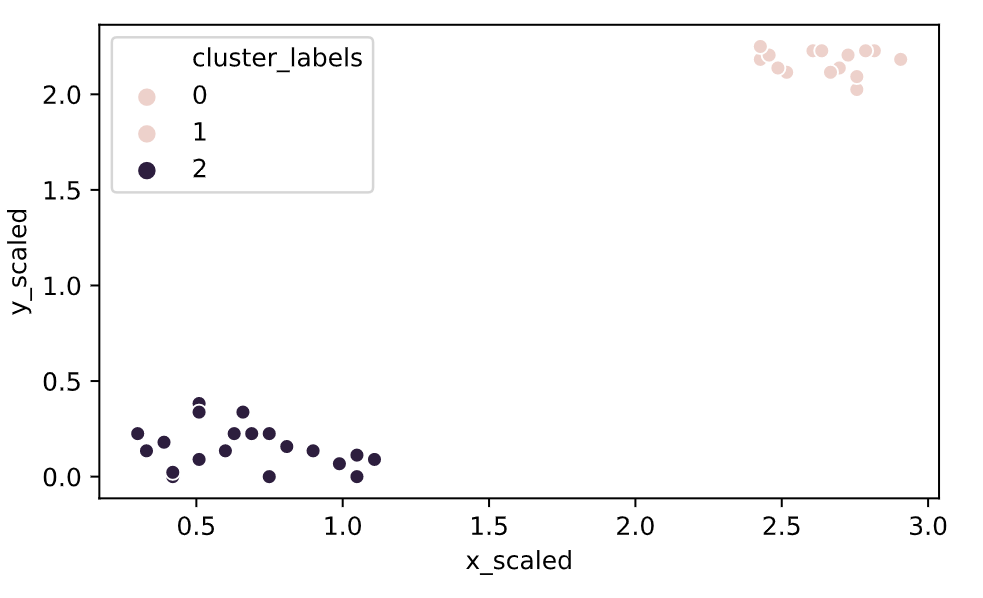

>  Notice that in this example, the clusters formed are not different from the ones created using the ward method.

**Hierarchical clustering: complete method**

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* Import fcluster and linkage from scipy.cluster.hierarchy.
* Use the complete method in the .linkage() function.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

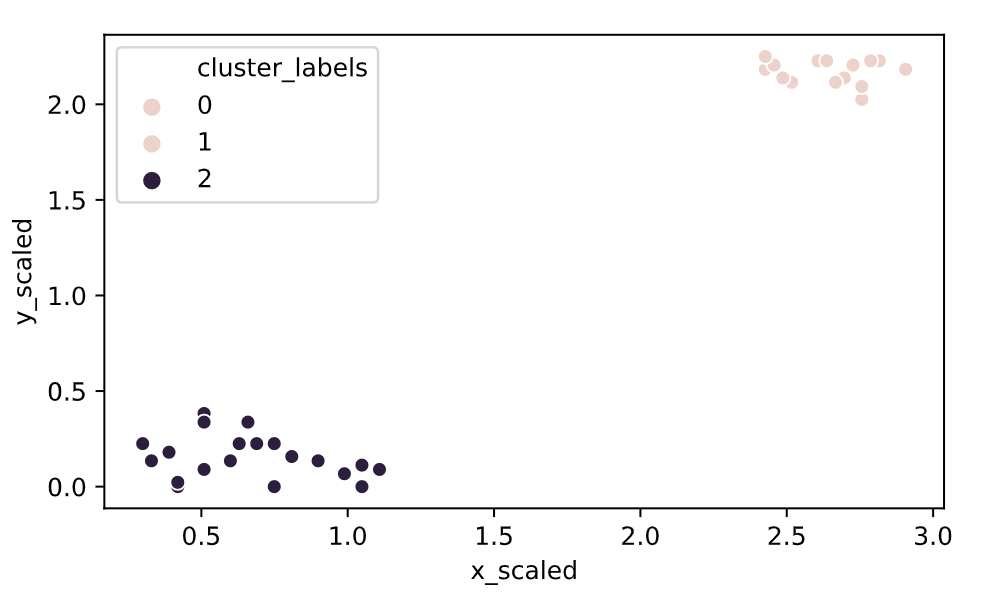

###Visualize clusters

**Why visualize clusters?**

One can quickly make sense of the clusters formed by any algorithm by visually analyzing it.

It can serve as an additional step for validation of clusters formed. Additionally, you may also spot trends in your data by visually going through it.

**Visualize clusters with matplotlib and seaborn**

* first import the pyplot class in matplotlib

```
import matplotlib.pyplot as plt
```

* start with a Pandas data frame which has the columns - x, y and label for its x and y coordinates and cluster labels, A and B. 

```
df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
'y': [1, 1, 5, 5, 2],
'labels': ['A', 'A', 'B', 'B', 'A']})
```


* use the c argument of the scatter method, to assign a color to each cluster. However, we first need to manually map each cluster to a color. Therefore, we define a dictionary named colors with the cluster labels as keys, and the color associated with the clusters as its values. We then pass a list of colors to c argument using a lambda function, which returns the corresponding value of each cluster label

```
colors = {'A':'red', 'B':'blue'}

df.plot.scatter(x='x', y='y',
c=df['labels'].apply(lambda x: colors[x]))

plt.show()
```

**Visualize clusters with seaborn**

 We use the same data frame as earlier to visualize the clusters. To visualize the data points with each point associated with a separate color, we use the hue argument of the scatterplot method, and pass on the column name of the cluster labels, which is labels in this example.

 ```
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.DataFrame({'x': [2, 3, 5, 6, 2], 'y': [1, 1, 5, 5, 2], 'labels': ['A', 'A', 'B', 'B', 'A']})

sns.scatterplot(x='x', y='y', hue='labels', data=df)
plt.show()
```

**Comparison of both methods of visualization**
Recall from the last lesson that seaborn shows an extra cluster with label 0 if the cluster labels are integers. In this example, we have manually assigned string cluster labels, so this issue will not arise.

Although the results are comparable, there are two reasons why we prefer seaborn. 
* First, the implementation using seaborn was more convenient once you have stored cluster labels in your data frame. 
* Second, you do not need to manually select colors in seaborn as it would be using a default palette no matter how many clusters you have.

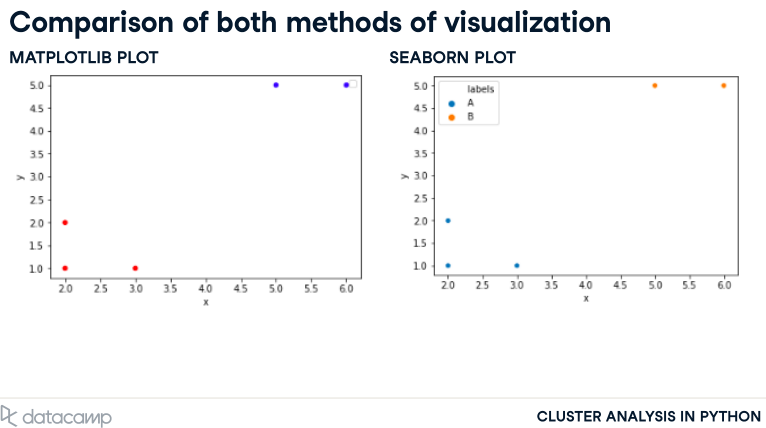



**Visualize clusters with matplotlib**

Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the pyplot class from matplotlib module as plt.
* Define a colors dictionary for two cluster labels, 1 and 2.
* Plot a scatter plot with colors for each cluster as defined by the colors dictionary.

```
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1 :'red', 2 :'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()
```

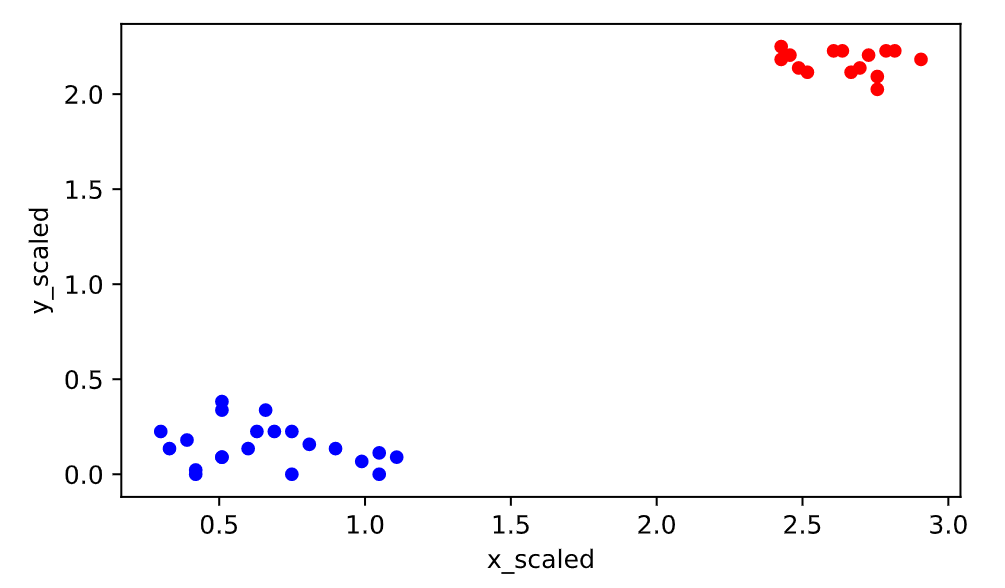

**Visualize clusters with seaborn**

visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the seaborn module as sns.
* Plot a scatter plot using the .scatterplot() method of seaborn, with the cluster labels as the hue argument.

```
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()
```

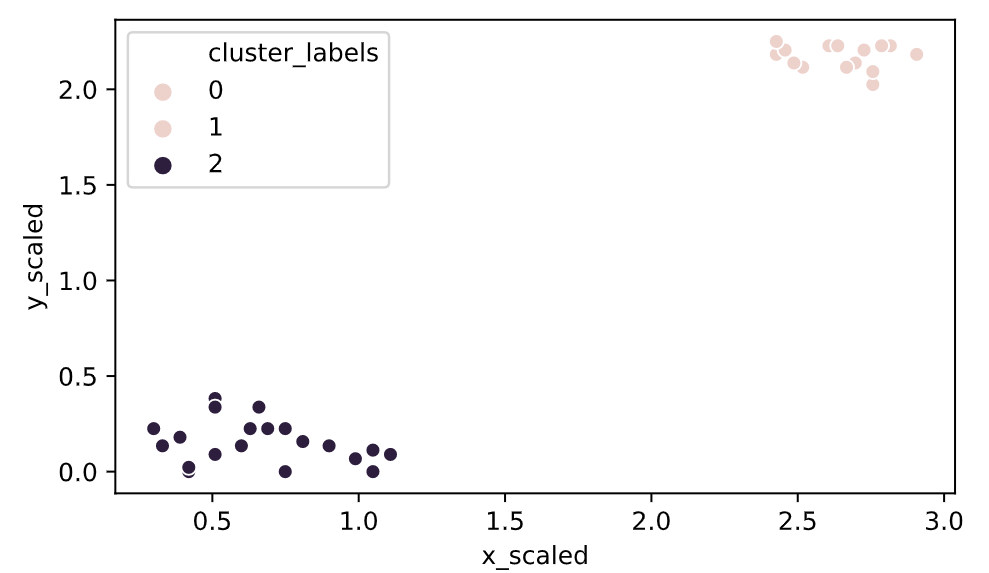

###How many clusters?


> To decide on the number of clusters in hierarchical clustering, we can use a graphical diagram called the dendrogram. 

**Create a dendrogram in SciPy**

* import the method from ```scipy.cluster.hierarchy``` 

```
from scipy.cluster.hierarchy import dendrogram
```

* use the linkage method to create a distance matrix

```
Z = linkage(df[['x_whiten', 'y_whiten']],
method='ward',
metric='euclidean')
```

* use the dendrogram method and provide the linkage object as an argument, and display the plot

```
dn = dendrogram(Z)
plt.show()
```
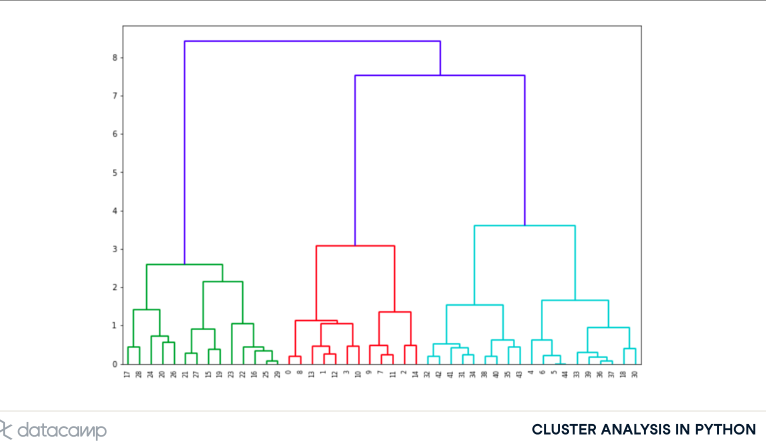


 Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters.
 
 > In the dendrogram, each inverted U represents a cluster divided into its two child clusters. 


 The inverted U at the top of the figure represents a single cluster of all the data points. The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.

If you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. At the horizontal line drawn on the figure, we see that there are three clusters.

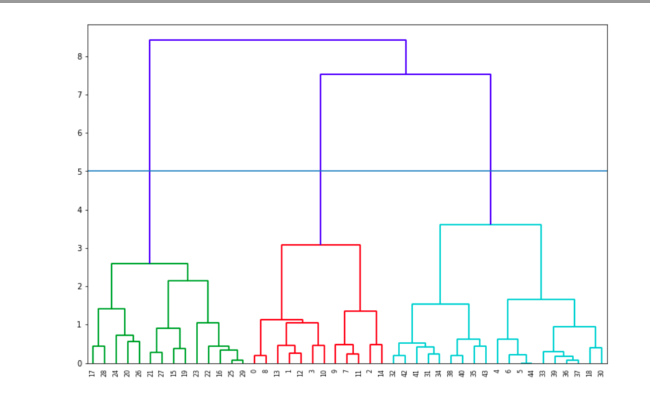

 When you move the line below, the number of clusters increases but the inter-cluster distance decreases. 
 > This information helps us in deciding the number of clusters. 

 For instance, even though we haven't looked at the distribution of the data points, it seems that the top three clusters have the highest distances between them. At this point, I must reiterate that there is no right metric to decide how many clusters are ideal. 

 Here is the result of performing the clustering with two clusters.

 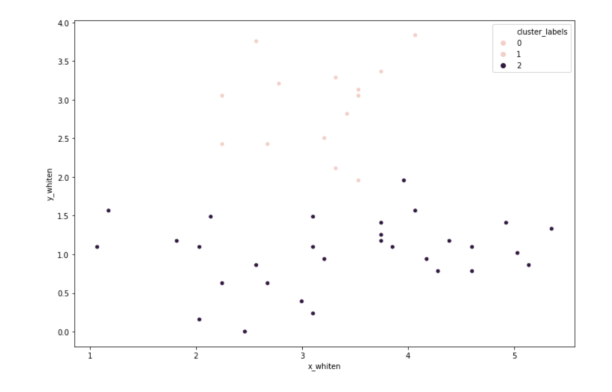

Here is the result with three clusters.

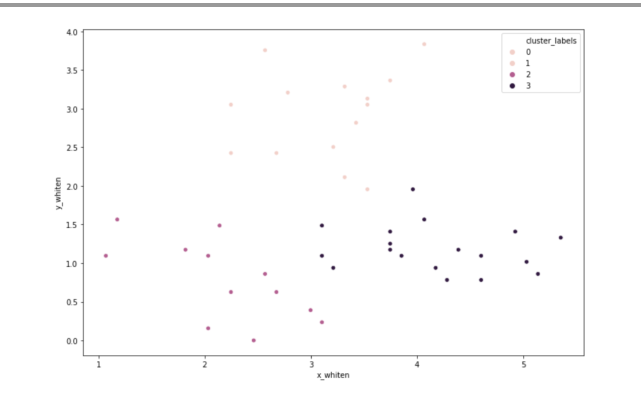

And here is how 4 clusters look on the data. 

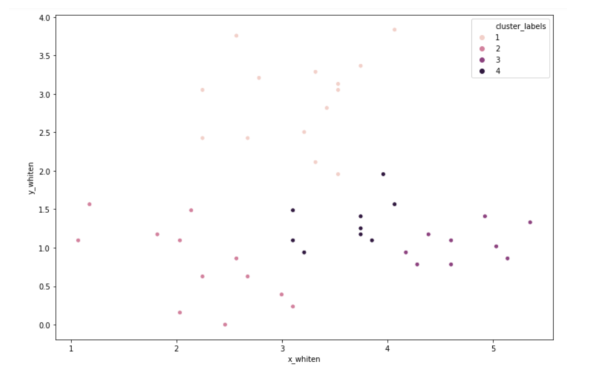

> Although the dendorgram indicated we could go ahead with three clusters, the case with four clusters makes sense too. Therefore, an additional check of visualizing the data may be performed before deciding on the number of clusters.

**Create a dendrogram**

Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the dendrogram function from scipy.cluster.hierarchy.
* Create a dendrogram using the linkage object.
* Display the dendrogram using .show() method of the plt object.

```
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()
```

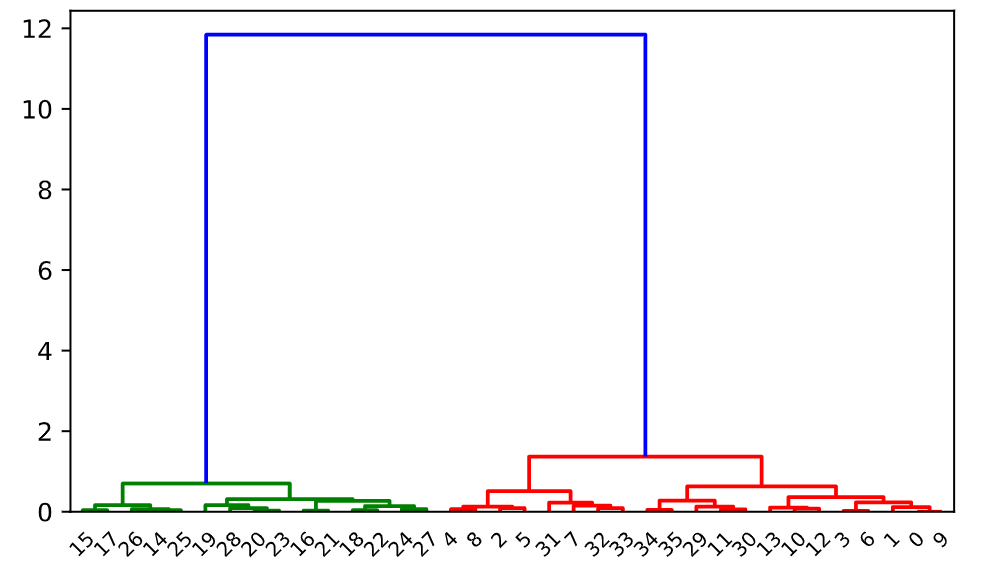

###Limitations of hierarchical clustering

Now that you are familiar with hierarchical clustering let us look at the challenges when performing this type of clustering.

**Measuring speed in hierarchical clustering**

We will use the **timeit module** to check runtime of functions. 

As the most time-consuming step in the process of hierarchical clustering is constructing the distance matrix through the linkage method, we will time the amount of time it takes to form the matrix.

 For the purpose of this exercise, we will use randomly generated data points on the XY plane. To test the limits of the algorithm, we will use an increasing number of data points.


> let us look at how long it takes to run the linkage method for 100 points with randomly generated coordinates. 

*  import the random and timeit modules to generate the points and time the runtime of a function respectively

```
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
```

*  create a data frame with 100 points, and randomly generate 100 points within coordinates in the range of zero to a hundred

```
points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
'y': random.sample(range(0, points), points)})
```

* To check the time of a function in the interpreter, we use the percent symbol before the timeit keyword followed by the statement that we were about to run. 

> The timeit module runs the function multiple times and reports the mean and standard deviations of the runtimes.

```
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

1.02 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

Let us now perform iterations for an increasing number of points, check how long it takes to run the linkage method and then plot a graph to compare the performace.


**Comparison of runtime of linkage method**

If you plot the runtime of the linkage method with the number of points, you can see that the runtime increases with the increase in number of data points. In addition to it, you would notice that the increase in run time is not linear with respect to the increase in data points, but quadratic. This makes the technique of hierarchical clustering infeasible for huge number of data points, for instance, the shopping habits of all customers in Walmart in a year.


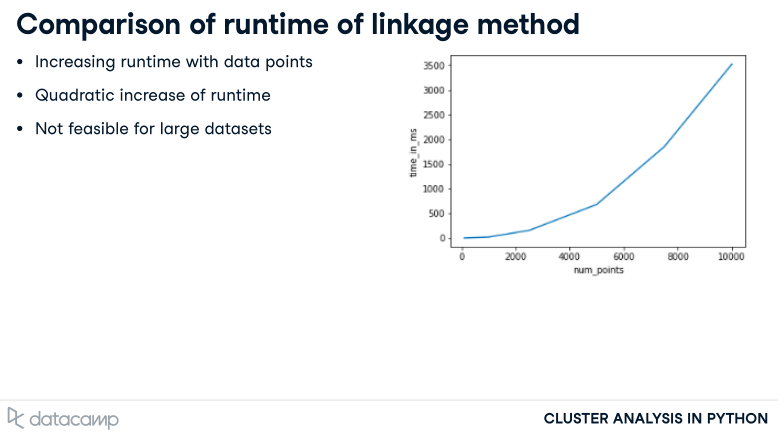

**FIFA 18: exploring defenders**

 the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

* Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.

```
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')
```

* Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).

```
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
```

* Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

```
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())
```

```
<script.py> output:
                    scaled_sliding_tackle  scaled_aggression
    cluster_labels                                          
    1                                2.99               4.35
    2                                0.74               1.94
    3                                1.34               3.62
```

* Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.

```
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()
```

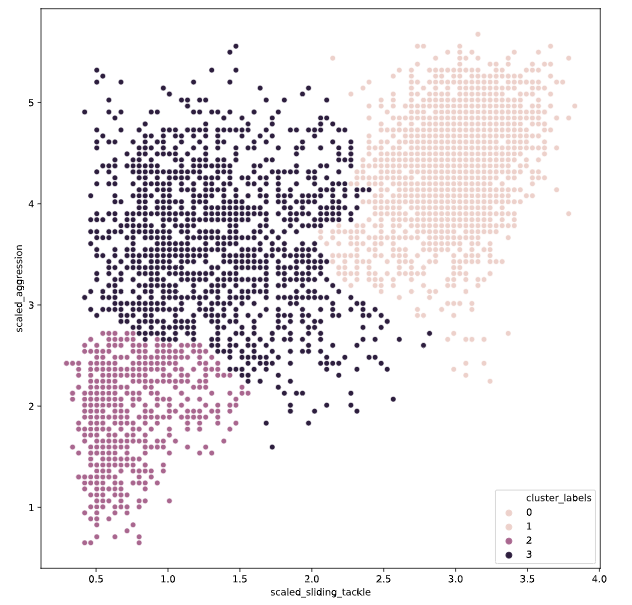

>  Notice how long it took to run hierarchical clustering on a few thousand data points. In the next chapter, you will explore clusters in data through k-means clustering.

##K-Means Clustering


##Clustering in Real World
